In [291]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

db = pd.read_excel('C:/projects/laboratory/Nanoparticle_cytotoxicity/databases/New_descriptors.xlsx')

#db['EN/IR'] = db['Electronegativity'] / db['Ionic radius']
#db['SC/SA'] = db['Surface charge (mV)'] / db['Surface area (m2/g)']
#db['HS/CS'] = db['Hydro size (nm)'] / db['Core size (nm)']

db = db.drop(columns= ['Material type', 'Elements'])

y = db.loc[:, 'Viability (%)']
x = db.loc[:, db.columns != 'Viability (%)']

sc = MinMaxScaler()
x = sc.fit_transform(x)

bins = np.linspace(0, 494, 2)
y_binned = np.digitize(y, bins)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=2022, stratify=y_binned)

In [245]:
db

,Electronegativity,Ionic radius,Core size (nm),Hydro size (nm),Surface charge (mV),Surface area (m2/g),Cell type,Exposure dose (ug/mL),Number of atoms,Molecular weight (g/mol),Topological polar surface area (Å²),a (Å),b (Å),c (Å),α (°),β (°),γ (°),Viability (%)
0,1.90,73.0,12.8,313.8,7.6,74.2,1,200.0,2,79.5450,17.1,4.685,3.423,5.132,90,99.5,90,9.1
1,1.65,74.0,22.6,114.7,28.8,47.4,0,200.0,2,81.3800,17.1,3.249,3.249,5.206,90,90.0,120,9.5
2,1.65,74.0,22.6,114.7,28.8,47.4,0,100.0,2,81.3800,17.1,3.249,3.249,5.206,90,90.0,120,10.2
3,1.65,74.0,22.6,69.4,28.8,47.4,1,100.0,2,81.3800,17.1,3.249,3.249,5.206,90,90.0,120,11.0
4,1.55,58.0,51.5,291.7,-46.1,25.9,1,200.0,5,157.8743,43.4,5.752,5.752,9.426,90,90.0,90,11.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,1.91,69.0,13.1,189.5,27.6,68.7,1,1.6,2,74.6928,17.1,4.171,4.171,4.171,90,90.0,90,99.0
490,1.91,69.0,13.1,189.5,27.6,68.7,1,50.0,2,74.6928,17.1,4.171,4.171,4.171,90,90.0,90,99.0
491,2.05,76.0,11.8,274.9,-35.3,93.6,0,0.8,5,291.5200,43.4,4.920,12.460,5.420,90,90.0,90,99.0
492,2.05,76.0,11.8,274.9,-35.3,93.6,0,25.0,5,291.5200,43.4,4.920,12.460,5.420,90,90.0,90,99.0


In [295]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100, min_samples_leaf=1, criterion='squared_error')

regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
y1_pred = regressor.predict(x_train)

(0.0, 100.0)

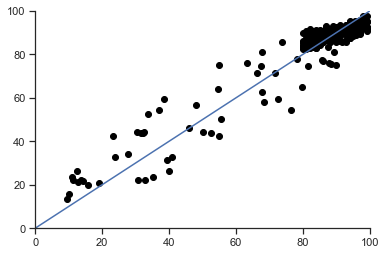

In [296]:
plt.plot(y_train, y1_pred, 'o', color='black')
plt.plot([0,100], [0,100])
plt.xlim(0,100)
plt.ylim(0, 100)

Q2: -8.37892879416773
r2_test: 0.7471580606740836
MAE_test: 8.03673434744268
MSE_test: 117.93363801428356
RMSE_test: 10.859725503634222
r2_train: 0.9138189976821544
MAE_train: 4.281437218468469
MSE_train: 33.88313879592842
RMSE_train: 5.820922503858681


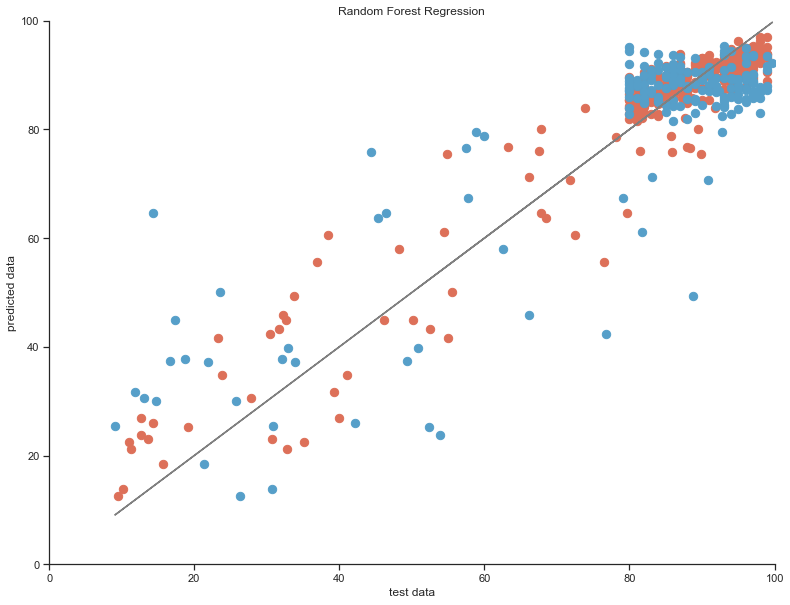

In [294]:
from sklearn.model_selection import cross_val_score

accuracy = cross_val_score(regressor, x_train, y_train.ravel(), cv=10,
                           scoring='neg_mean_absolute_error')
print("Q2:",accuracy.mean())

from sklearn import metrics
print('r2_test:', metrics.r2_score(y_test, y_pred))
print('MAE_test:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE_test:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE_test:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2_train:', metrics.r2_score(y_train, y1_pred))
print('MAE_train:', metrics.mean_absolute_error(y_train, y1_pred))
print('MSE_train:', metrics.mean_squared_error(y_train, y1_pred))
print('RMSE_train:', np.sqrt(metrics.mean_squared_error(y_train, y1_pred)))
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set(style="ticks", rc=custom_params)
f, ax = plt.subplots(figsize=(13, 10))
plt.scatter(y_train, y1_pred, color='#DD7059', s=70)
plt.scatter(y_test, y_pred, color='#569FC9',s=70)
plt.plot(y_test, y_test, color='gray')
plt.title('Random Forest Regression')
plt.xlabel('test data')
plt.ylabel('predicted data')
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler

Q2: -0.03927279364439058
r2_test: 0.6524155271905261
MAE_test: 0.03337432240573029
MSE_test: 0.0029495997239538416
RMSE_test: 0.054310217491314115
r2_train: 0.7303314023203872
MAE_train: 0.022905029139563195
MSE_train: 0.0016328433058201974
RMSE_train: 0.040408455870277915


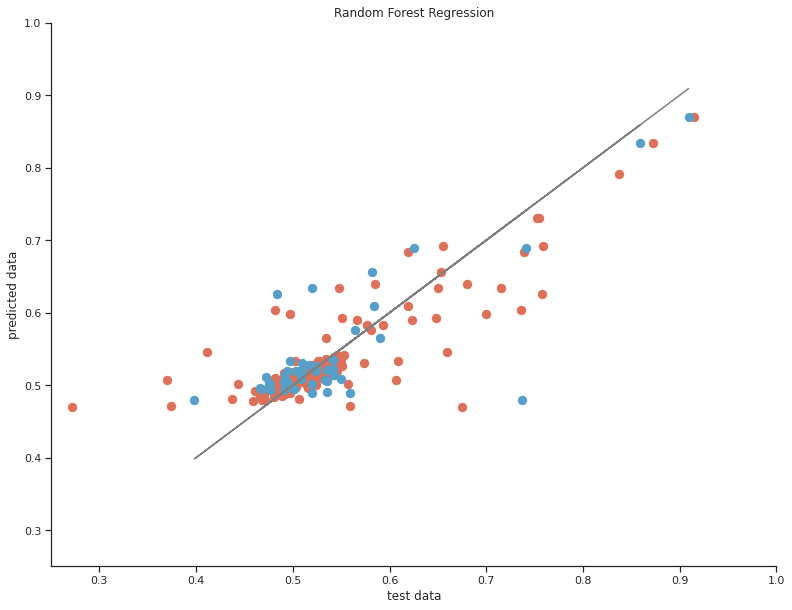

In [ ]:
def rfr_model(x, y):
# Perform Grid-Search
    gsc = GridSearchCV(
        estimator=RandomForestRegressor(),
        param_grid={
            'max_depth': range(3,7),
            'n_estimators': (10, 50, 100, 1000),
        },
        cv=5, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)
    
    grid_result = gsc.fit(x, y)
    best_params = grid_result.best_params_
    
    rfr = RandomForestRegressor(max_depth=best_params["max_depth"], n_estimators=best_params["n_estimators"],random_state=False, verbose=False)
    scores = cross_val_score(rfr, x, y, cv=10, 
                             scoring='neg_mean_absolute_error')

    return scores
    predictions = cross_val_predict(rfr, x, y, cv=10)
    ccuracy = cross_val_score(regressor, x_train, y_train.ravel(), cv=10,
                           scoring='neg_mean_absolute_error')
print("Q2:",accuracy.mean())

from sklearn import metrics
print('r2_test:', metrics.r2_score(y_test, y_pred))
print('MAE_test:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE_test:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE_test:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2_train:', metrics.r2_score(y_train, y1_pred))
print('MAE_train:', metrics.mean_absolute_error(y_train, y1_pred))
print('MSE_train:', metrics.mean_squared_error(y_train, y1_pred))
print('RMSE_train:', np.sqrt(metrics.mean_squared_error(y_train, y1_pred)))
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set(style="ticks", rc=custom_params)
f, ax = plt.subplots(figsize=(13, 10))
plt.scatter(y_train, y1_pred, color='#DD7059', s=70)
plt.scatter(y_test, y_pred, color='#569FC9',s=70)
plt.plot(y_test, y_test, color='gray')
plt.title('Random Forest Regression')
plt.xlabel('test data')
plt.ylabel('predicted data')
plt.xlim(0.25, 1)
plt.ylim(0.25, 1)
plt.show()